,60,70,80,90,100,Sum
F,3,6,5,2,4,20
M,3,7,2,5,3,20
Sum,6,13,7,7,7,40


,60,70,80,90,100,Sum
F,7.5,15.0,12.5,5.0,10.0,50
M,7.5,17.5,5.0,12.5,7.5,50
Sum,15.0,32.5,17.5,17.5,17.5,100


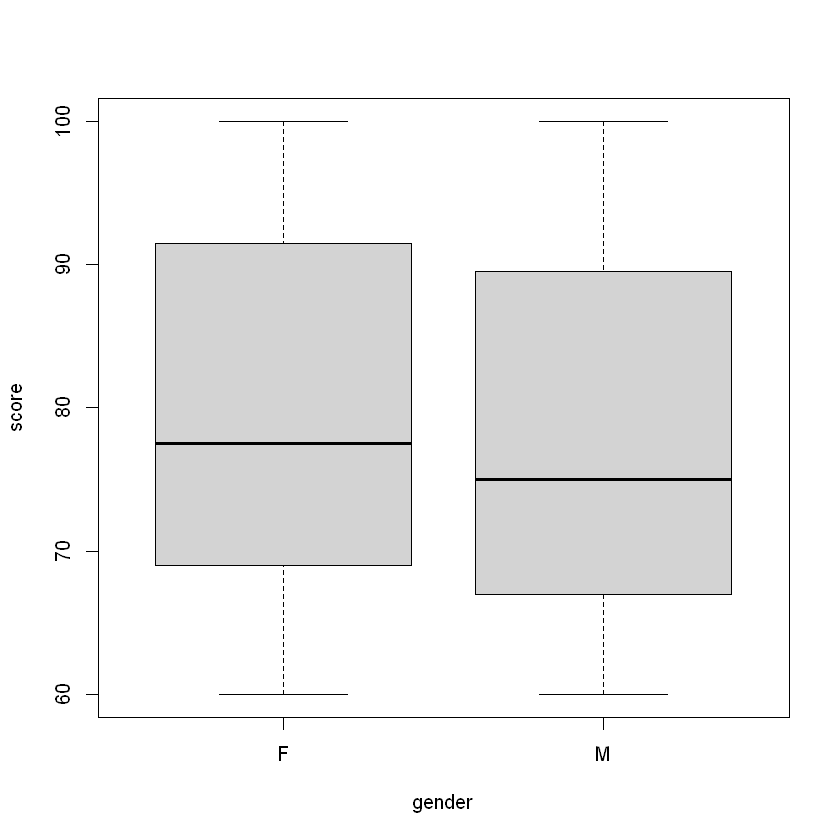

In [68]:
samp1 <- sample(x = 60:100, size = 40, replace = TRUE)
gsamp <- as.factor(sample(x = c('M','F'),prob = c(.55,.45),
       size = 40, 
       replace = TRUE))
#gsampf <- as.factor(gsamp) 
df1 <- data.frame(gender=gsamp, score=samp1)
table1 <- table(df1$gender, round(df1$score,digits=-1))
addmargins(table1)
#addmargins(prop.table(table1,1))
#addmargins(round(prop.table(table1)*100,2))
addmargins(round(prop.table(table1)*100,2))
plot(df1)

In [73]:
t.test(score ~ gender, data = df1, var.equal = TRUE)


	Two Sample t-test

data:  score by gender
t = 0.2221, df = 38, p-value = 0.8254
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -7.3033  9.1033
sample estimates:
mean in group F mean in group M 
           79.4            78.5 


In [74]:
var.test(score ~ gender, df1, alternative = "two.sided")


	F test to compare two variances

data:  score by gender
F = 0.96777, num df = 19, denom df = 19, p-value = 0.9438
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3830553 2.4450245
sample estimates:
ratio of variances 
         0.9677704 


In [72]:
df4 <- data.frame(matrix(ncol = 4, nrow = 0))
colnames(df4) <- c('successes', 'proportion', 'chi', 'p_value')

for (i in 1:50) {
    gsamp <- sample(x = c('M','F'),prob = c(.55,.45), size = 40, replace = TRUE)
    success <- sum(gsamp == 'F')
    prop <- success/40
    res <- prop.test(x = success, n = 40, p = 0.45, correct = FALSE)
    df4[i,] <- c(success, prop, res$statistic, res$p.value)
    #print(paste('proportion: ', i, " ", prop))
}
df4

,successes,proportion,chi,p_value
,<dbl>,<dbl>,<dbl>,<dbl>
1,20,0.500,0.4040404,0.52500997
2,19,0.475,0.1010101,0.75062082
3,18,0.450,0.0000000,1.00000000
4,16,0.400,0.4040404,0.52500997
5,14,0.350,1.6161616,0.20362783
6,14,0.350,1.6161616,0.20362783
7,21,0.525,0.9090909,0.34035574
8,16,0.400,0.4040404,0.52500997
9,16,0.400,0.4040404,0.52500997


In [41]:
if(!suppressWarnings(require(sqldf))) install.packages("sqldf")
library(sqldf)
query <- "select gender, avg(score) as avg_score from df1 group by gender"
meanByGender <- sqldf(query)
#t2 <- table(meanByGender$gender, meanByGender$avg_score)
#t2
meanByGender

gender,avg_score
<fct>,<dbl>
F,78.25000
M,82.71429


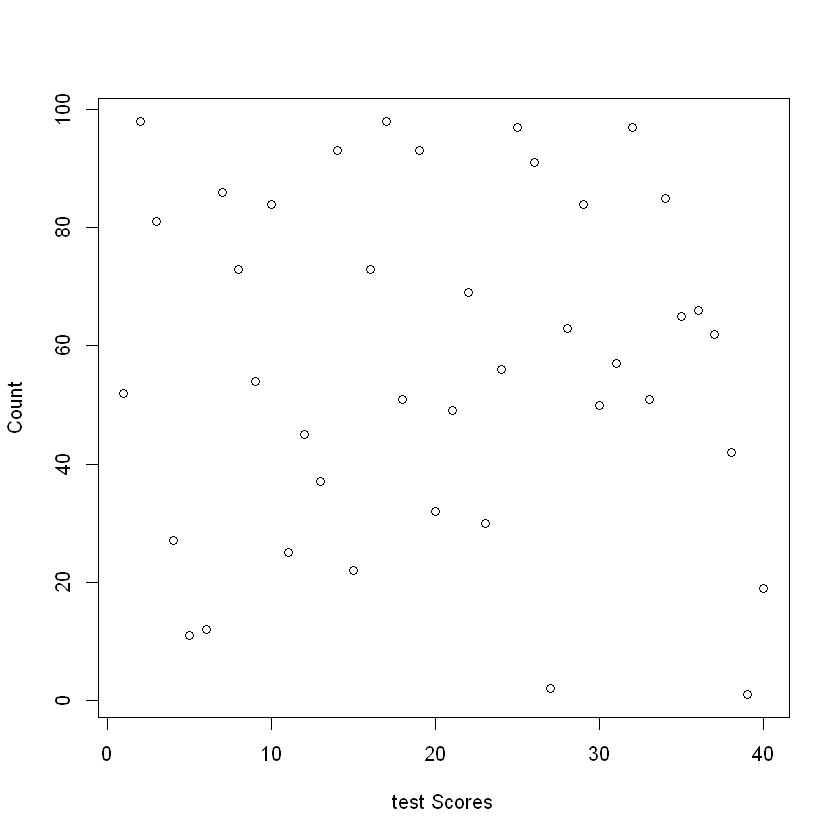

In [7]:
samp2 <- rnorm(n = 40, mean = 70, sd = 8)
plot(samp1, xlab='test Scores', ylab='Count', )